In [63]:
from __future__ import print_function

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from anchor.visualize import MODALITY_TO_COLOR, MODALITY_ORDER, MODALITY_PALETTE
modality_order = MODALITY_ORDER

sns.set(style='ticks', context='talk', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})

%matplotlib inline

%load_ext autoreload
%autoreload 2

folder = 'figures'

import flotilla
study = flotilla.embark('singlecell_pnm_figure4_voyages', 
                        flotilla_dir='/projects/ps-yeolab/obotvinnik/flotilla_projects/')
# study = flotilla.embark('singlecell_pnm_figure1_supplementary_post_splicing_filtering')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2016-10-20 12:11:15	Reading datapackage from /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_figure4_voyages/datapackage.json
2016-10-20 12:11:15	Parsing datapackage to create a Study object
https://s3-us-west-2.amazonaws.com/flotilla-projects/ercc/ERCC_Controls.txt has not been downloaded before.


/home/obotvinnik/workspace-git/flotilla/flotilla/__init__.py:65: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  load_species_data=load_species_data)
Error loading species hg19 data: HTTP Error 404: Not Found

2016-10-20 12:11:45 	Initializing Study
2016-10-20 12:11:45 	Initializing Predictor configuration manager for Study
2016-10-20 12:11:45	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2016-10-20 12:11:45	Added ExtraTreesClassifier to default predictors
2016-10-20 12:11:45	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2016-10-20 12:11:45	Added ExtraTreesRegressor to default predictors
2016-10-20 12:11:45	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2016-10-20 12:11:45	Added GradientBoostingClassifier to default predictors
2016-10-20 12:11:45	Predictor GradientBoostingRegressor is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingRegressor'>
2016-10-20 12:11:45	Added GradientBoostingRegressor to default predictors
2016-10-20 12:11:49 	Building Gene Ontology database...
2016-10-20 12:11:59 		Done
2016-

In [6]:
bimodal = study.supplemental.modalities_tidy.query('modality == "bimodal"')
print(bimodal.shape)
bimodal.head()

(7079, 3)


,phenotype,event_id,modality
1,MN,exon:chr10:101480744-101480825:-@exon:chr10:10...,bimodal
4,MN,exon:chr10:102747070-102747240:-@exon:chr10:10...,bimodal
6,MN,exon:chr10:103113864-103113985:+@exon:chr10:10...,bimodal
10,MN,exon:chr10:103360960-103361093:+@exon:chr10:10...,bimodal
12,MN,exon:chr10:103360960-103361093:+@exon:chr10:10...,bimodal


In [7]:
study.splicing.feature_data.head()

,Unnamed: 0,criteria,criteria_additional,criteria_full,ensembl_id,exon1,exon1_length,exon2,exon2_length,exon3,...,junction12,junction13,junction23,junction24,junction34,strand,transcript_id,exon2_divisible_by_3,one_ensembl_id,splice_type
event_id,,,,,,,,,,,,,,,,,,,,,
exon:chr10:100190328-100190427:-@exon:chr10:100189548-100189646:-@exon:chr10:100189330-100189399:-,NaN,best,appris_principal,"best,appris_principal",ENSG00000107521,exon:chr10:100190328-100190427:-,100,exon:chr10:100189548-100189646:-,99,exon:chr10:100189330-100189399:-,...,chr10:100189647-100190327:-,chr10:100189400-100190327:-,chr10:100189400-100189547:-,NaN,NaN,-,"ENST00000361490.4,ENST00000414009.1,ENST000003...",True,ENSG00000107521,SE
exon:chr10:100193697-100193848:-@exon:chr10:100190888-100191048:-@exon:chr10:100190328-100190427:-,NaN,only one,NaN,only one,ENSG00000107521,exon:chr10:100193697-100193848:-,152,exon:chr10:100190888-100191048:-,161,exon:chr10:100190328-100190427:-,...,chr10:100191049-100193696:-,chr10:100190428-100193696:-,chr10:100190428-100190887:-,NaN,NaN,-,"ENST00000361490.4,ENST00000414009.1,ENST000003...",False,ENSG00000107521,SE
exon:chr10:100195392-100195529:-@exon:chr10:100195029-100195171:-@exon:chr10:100193697-100193848:-,NaN,best,appris_principal,"best,appris_principal",ENSG00000107521,exon:chr10:100195392-100195529:-,138,exon:chr10:100195029-100195171:-,143,exon:chr10:100193697-100193848:-,...,chr10:100195172-100195391:-,chr10:100193849-100195391:-,chr10:100193849-100195028:-,NaN,NaN,-,"ENST00000361490.4,ENST00000325103.6,ENST000004...",False,ENSG00000107521,SE
exon:chr10:101165513-101165617:-@exon:chr10:101163481-101163631:-@exon:chr10:101163226-101163391:-,NaN,only one,NaN,only one,ENSG00000120053,exon:chr10:101165513-101165617:-,105,exon:chr10:101163481-101163631:-,151,exon:chr10:101163226-101163391:-,...,chr10:101163632-101165512:-,chr10:101163392-101165512:-,chr10:101163392-101163480:-,NaN,NaN,-,"ENST00000543866.1,ENST00000370508.5",False,ENSG00000120053,SE
exon:chr10:101419263-101419345:+@exon:chr10:101419619-101419721:+@exon:chr10:101421203-101421385:+,NaN,only one,NaN,only one,ENSG00000198018,exon:chr10:101419263-101419345:+,83,exon:chr10:101419619-101419721:+,103,exon:chr10:101421203-101421385:+,...,chr10:101419346-101419618:+,chr10:101419346-101421202:+,chr10:101419722-101421202:+,NaN,NaN,+,ENST00000370489.4,False,ENSG00000198018,SE


In [17]:
exon_cols = [x for x in study.splicing.feature_data if x.startswith('exon')]
exon_cols

['exon1',
 'exon1_length',
 'exon2',
 'exon2_length',
 'exon3',
 'exon3_length',
 'exon4',
 'exon4_length',
 'exon2_divisible_by_3']

In [20]:
cols = exon_cols + ['ensembl_id', 'gene_name', 'splice_type']

In [21]:
bimodal_metadata = bimodal.join(study.splicing.feature_data[cols], on='event_id')
print(bimodal_metadata.shape)
# bimodal_metadata = bimodal_metadata.drop_duplicates()
# print(bimodal_metadata.shape)
bimodal_metadata.head()

(7079, 15)


,phenotype,event_id,modality,exon1,exon1_length,exon2,exon2_length,exon3,exon3_length,exon4,exon4_length,exon2_divisible_by_3,ensembl_id,gene_name,splice_type
1,MN,exon:chr10:101480744-101480825:-@exon:chr10:10...,bimodal,exon:chr10:101480744-101480825:-,82,exon:chr10:101478103-101478257:-,155,exon:chr10:101476105-101476218:-,114,NaN,NaN,False,ENSG00000014919,COX15,SE
4,MN,exon:chr10:102747070-102747240:-@exon:chr10:10...,bimodal,exon:chr10:102747070-102747240:-,171,exon:chr10:102746847-102746953:-,107,exon:chr10:102746506-102746732:-,227,NaN,NaN,False,ENSG00000055950,MRPL43,SE
6,MN,exon:chr10:103113864-103113985:+@exon:chr10:10...,bimodal,exon:chr10:103113864-103113985:+,122,exon:chr10:103190102-103190209:+,108,exon:chr10:103221738-103221815:+,78,NaN,NaN,True,ENSG00000166167,BTRC,SE
10,MN,exon:chr10:103360960-103361093:+@exon:chr10:10...,bimodal,exon:chr10:103360960-103361093:+,134,exon:chr10:103364897-103364969:+,73,exon:chr10:103368592-103368694:+,103,NaN,NaN,False,ENSG00000166171,DPCD,SE
12,MN,exon:chr10:103360960-103361093:+@exon:chr10:10...,bimodal,exon:chr10:103360960-103361093:+,134,exon:chr10:103368592-103368694:+,103,exon:chr10:103369124-103369196:+,73,NaN,NaN,False,ENSG00000166171,DPCD,SE


In [22]:
import pyfaidx

In [23]:
hg19 = pyfaidx.Fasta('/projects/ps-yeolab/genomes/hg19/gencode/v19/GRCh37.p13.genome.fa')
hg19

Fasta("/projects/ps-yeolab/genomes/hg19/gencode/v19/GRCh37.p13.genome.fa")

In [24]:
# hg19['chr10:101480744-101480825']

KeyError: 'chr10:101480744-101480825 not in /projects/ps-yeolab/genomes/hg19/gencode/v19/GRCh37.p13.genome.fa.'

In [35]:
# exon:chr10:101480744-101480825:-
-hg19['chr10'][101480744:101480825]

>chr10:101480825-101480745 (complement)
TTGCCTGAAACCCACCAACTCCTACAGTTGAGACGATTTGCTCATGGAACAGCAGGTCTGGTGTTCCTTACGGCCCTCTCA

In [27]:
len('TGAGAGGGCCGTAAGGAACACCAGACCTGCTGTTCCATGAGCAAATCGTCTCAACTGTAGGAGTTGGTGGGTTTCAGGCAA')

81

SHould be 82 .. and on the genome browser it looks one base too short on the left (downstream since this is negative) side ... let's check a postiive event

In [50]:
# exon:chr10:103113864-103113985:+
sequence = hg19['chr10'][103113864:103113985]
sequence

>chr10:103113865-103113985
GCGCTGCGTTGGCTGCGGCCTGGCACCAAAGGGGCGGCCCCGGCGGAGAGCGGACCCAGTGGCCTCGGCGATTATGGACCCGGCCGAGGCGGTGCTGCAAGAGAAGGCACTCAAGTTTATG

In [52]:
str(sequence)

'GCGCTGCGTTGGCTGCGGCCTGGCACCAAAGGGGCGGCCCCGGCGGAGAGCGGACCCAGTGGCCTCGGCGATTATGGACCCGGCCGAGGCGGTGCTGCAAGAGAAGGCACTCAAGTTTATG'

In [ ]:
sequence.

In [36]:
from outrigger.region import Region

In [37]:
import re

In [40]:
re.match('exon\d', 'exonasdf')

In [41]:
re.match('exon\d', 'exon1')

In [45]:
feature_data_subset = study.splicing.feature_data.loc[bimodal['event_id'].unique()]
print(feature_data_subset.shape)
feature_data_subset.head()

(5602, 26)


,Unnamed: 0,criteria,criteria_additional,criteria_full,ensembl_id,exon1,exon1_length,exon2,exon2_length,exon3,...,junction12,junction13,junction23,junction24,junction34,strand,transcript_id,exon2_divisible_by_3,one_ensembl_id,splice_type
event_id,,,,,,,,,,,,,,,,,,,,,
exon:chr10:101480744-101480825:-@exon:chr10:101478103-101478257:-@exon:chr10:101476105-101476218:-,NaN,only one,NaN,only one,ENSG00000014919,exon:chr10:101480744-101480825:-,82,exon:chr10:101478103-101478257:-,155,exon:chr10:101476105-101476218:-,...,chr10:101478258-101480743:-,chr10:101476219-101480743:-,chr10:101476219-101478102:-,NaN,NaN,-,"ENST00000016171.5,ENST00000370483.5",False,ENSG00000014919,SE
exon:chr10:102747070-102747240:-@exon:chr10:102746847-102746953:-@exon:chr10:102746506-102746732:-,NaN,best,appris_principal,"best,appris_principal",ENSG00000055950,exon:chr10:102747070-102747240:-,171,exon:chr10:102746847-102746953:-,107,exon:chr10:102746506-102746732:-,...,chr10:102746954-102747069:-,chr10:102746733-102747069:-,chr10:102746733-102746846:-,NaN,NaN,-,"ENST00000318325.2,ENST00000370241.3,ENST000003...",False,ENSG00000055950,SE
exon:chr10:103113864-103113985:+@exon:chr10:103190102-103190209:+@exon:chr10:103221738-103221815:+,NaN,best,appris_principal,"best,appris_principal",ENSG00000166167,exon:chr10:103113864-103113985:+,122,exon:chr10:103190102-103190209:+,108,exon:chr10:103221738-103221815:+,...,chr10:103113986-103190101:+,chr10:103113986-103221737:+,chr10:103190210-103221737:+,NaN,NaN,+,"ENST00000393441.4,ENST00000475200.1,ENST000004...",True,ENSG00000166167,SE
exon:chr10:103360960-103361093:+@exon:chr10:103364897-103364969:+@exon:chr10:103368592-103368694:+,NaN,only one,NaN,only one,ENSG00000166171,exon:chr10:103360960-103361093:+,134,exon:chr10:103364897-103364969:+,73,exon:chr10:103368592-103368694:+,...,chr10:103361094-103364896:+,chr10:103361094-103368591:+,chr10:103364970-103368591:+,NaN,NaN,+,"ENST00000370147.1,ENST00000434727.1,ENST000003...",False,ENSG00000166171,SE
exon:chr10:103360960-103361093:+@exon:chr10:103368592-103368694:+@exon:chr10:103369124-103369196:+,NaN,best,appris_principal,"best,appris_principal",ENSG00000166171,exon:chr10:103360960-103361093:+,134,exon:chr10:103368592-103368694:+,103,exon:chr10:103369124-103369196:+,...,chr10:103361094-103368591:+,chr10:103361094-103369123:+,chr10:103368695-103369123:+,NaN,NaN,+,"ENST00000370147.1,ENST00000434727.1,ENST000003...",False,ENSG00000166171,SE


In [49]:
exon_cols = [x for x in study.splicing.feature_data if re.match('exon\d$', x)]
exon_cols

exon_seqs = pd.DataFrame(index=feature_data_subset.index, columns=exon_cols)
print(exon_seqs.shape)
exon_seqs.head()

(5602, 4)


,exon1,exon2,exon3,exon4
event_id,,,,
exon:chr10:101480744-101480825:-@exon:chr10:101478103-101478257:-@exon:chr10:101476105-101476218:-,NaN,NaN,NaN,NaN
exon:chr10:102747070-102747240:-@exon:chr10:102746847-102746953:-@exon:chr10:102746506-102746732:-,NaN,NaN,NaN,NaN
exon:chr10:103113864-103113985:+@exon:chr10:103190102-103190209:+@exon:chr10:103221738-103221815:+,NaN,NaN,NaN,NaN
exon:chr10:103360960-103361093:+@exon:chr10:103364897-103364969:+@exon:chr10:103368592-103368694:+,NaN,NaN,NaN,NaN
exon:chr10:103360960-103361093:+@exon:chr10:103368592-103368694:+@exon:chr10:103369124-103369196:+,NaN,NaN,NaN,NaN


In [53]:
for event_id, row in feature_data_subset.iterrows():
    for exon_i in exon_cols:
        if isinstance(row[exon_i], str):
            exon = Region(row[exon_i])
            sequence = hg19[exon.chrom][(exon.start-1):exon.stop]
            if exon.strand == '-':
                sequence = -sequence
            exon_seqs.loc[event_id, exon_i] = str(sequence)
print(exon_seqs.shape)
exon_seqs.head()

(5602, 4)


,exon1,exon2,exon3,exon4
event_id,,,,
exon:chr10:101480744-101480825:-@exon:chr10:101478103-101478257:-@exon:chr10:101476105-101476218:-,TTGCCTGAAACCCACCAACTCCTACAGTTGAGACGATTTGCTCATG...,GGGCTTTTGTGGCAGGGCTAGATGCTGGGCTTGTTTATAACTCCTT...,GGAATCACTTCAGTCACTGCCATTACAGTGCTCTACTTCCTCTCTC...,NaN
exon:chr10:102747070-102747240:-@exon:chr10:102746847-102746953:-@exon:chr10:102746506-102746732:-,CTCCTCGCTGCTTAGGCTCCGCGGCCTCCAAGCTGTAGCTATGACG...,GGAGTTCGTGGAGCGGGAGGTGATCGACTTCGCCCGACGGAATCCA...,TTAACGGGGCTGTGCGCGAGGAGAGCATCCACTGCAAGTCGGTCGA...,NaN
exon:chr10:103113864-103113985:+@exon:chr10:103190102-103190209:+@exon:chr10:103221738-103221815:+,GGCGCTGCGTTGGCTGCGGCCTGGCACCAAAGGGGCGGCCCCGGCG...,TGCTCTATGCCCAGGTCTCTGTGGCTGGGCTGCTCCAGCCTGGCGG...,AATTCCTCAGAGAGAGAAGACTGTAATAATGGCGAACCCCCTAGGA...,NaN
exon:chr10:103360960-103361093:+@exon:chr10:103364897-103364969:+@exon:chr10:103368592-103368694:+,CCTATCTTCATGCGCAAGGACACCAAGATGAGTTTCCAGTGGCGGA...,GCGGACTGGTTGGAGGCTTCTCTGGACCCCTCTGGCCATGCGGTGT...,GTACTACAAGAAGTTCTCCATTCCTGATCTAGATAGACACCAGCTA...,NaN
exon:chr10:103360960-103361093:+@exon:chr10:103368592-103368694:+@exon:chr10:103369124-103369196:+,CCTATCTTCATGCGCAAGGACACCAAGATGAGTTTCCAGTGGCGGA...,GTACTACAAGAAGTTCTCCATTCCTGATCTAGATAGACACCAGCTA...,TACCAGAAGCCAAAGGAGGTTGTGGTGGCCGAGTCTGAGCTACAGA...,NaN


In [55]:
pd.options.display.max_colwidth = 200

In [56]:
exon_seqs.tail()

,exon1,exon2,exon3,exon4
event_id,,,,
exon:chrX:86887210-86887434:+@exon:chrX:86888749-86888911:+@exon:chrX:86890563-86890775:+,GTACTACTACTATTGAAAAATATGACCTCAGGACCAACAGTTGGCTACATATTGGCACCATGAATGGCCGTAGGCTTCAATTTGGAGTCGCAGTTATTGATAATAAGCTCTATGTCGTGGGAGGAAGAGACGGTTTAAAAACTTTGAATACAGTGGAATGTTTTAATCCAGTTGGCAAAATCTGGACTGTGATGCC...,GTGTAGCCACTCTTGAAGGACCAATGTATGCTGTAGGTGGTCATGATGGATGGAGCTATCTAAATACTGTAGAAAGATGGGACCCTGAGGGACGACAGTGGAATTACGTAGCCAGTATGTCAACTCCTAGAAGCACAGTTGGTGTTGTTGCATTAAACAACAA,ATTATATGCTATTGGTGGACGTGATGGAAGTTCCTGCCTCAAATCAATGGAATACTTTGACCCACACACTAACAAGTGGAGTTTGTGTGCTCCAATGTCCAAAAGACGTGGAGGTGTGGGAGTTGCCACATACAATGGATTCTTATATGTTGTAGGGGGGCATGATGCCCCTGCTTCCAACCATTGCTCCAGGCTT...,NaN
exon:chrY:14813160-14813984:+@exon:chrY:14821321-14821476:+@exon:chrY:14832522-14832670:+,TGAATAATTGAACTTTGTTTATTTCTCCATATTTTTGCAGTGGTAATTCCATTATAAAACCTAATGAAACAATGTTTTTATAGATGGTGTGGAAAGACTTTTCTGGGCTCAGAGGTGAAACTGACCCTTGTGTATCAGCAGCATTTCTGACTGACTGAGAGAGTGTAGTGATTAACAGAGTTGTGATGTTAGTTAA...,GATAACTACATAAAGAGACAAAAAAAAGAAAAAAGAGCAAAGATCTGTGCTGTGTCAAGTATGACAGCCATCACTCATGGCTCTCCAGTAGGAGGGAACGACAGCCAGGGCCAGGTTCTTGATGGCCAGTCTCAGCATCTCTTCCAACAGAACCAG,ACTTCATCACCTGATTCTTCCAATGAGAATTCCGTAGCAACTCCTCCTCCAGAGGAACAAGGGCAAGGTGATGCCCCACCACAGCATGAAGATGAAGAGCCTGCATTTCCACATACTGAGCTGGCAAACCTGGATGACATGATCAACAG,NaN
exon:chrY:15591134-15591384:-@exon:chrY:15582001-15582109:-@exon:chrY:15560897-15560946:-,TCCATCACCCGCCTGGTTGGCTGGCGATACTCTCCGGGAAGGCCTGGACGCAGCTTGCCCACGTTGATGACGGGGTCATCCTCAGCTTGGCACTCACCAATCTGTCGCTGTCGCTCTTGGACTCGGGAAGGAGCAAGTCACTGGCTTTCTCAGACCATTAACAAGCTCTGTGTCTCTCTCTCTACAGCCGTCTCTT...,GCTGTTCGCTGCTACGAATCTTTAATCTTAAAAGCTGAAGGAAAAGTGGAGTCTGACTTCTTTTGCCAATTAGGTCACTTCAACCTCTTGTTGGAAGATTATTCAAAAG,CATTATCTGCATATCAGAGATATTACAGTTTACAGGCTGACTACTGGAAG,NaN
exon:chrY:21903204-21903374:-@exon:chrY:21901414-21901548:-@exon:chrY:21897507-21897636:-,ATTGTGATTGAGGAAGGTGGCTATGAAGCCATCTGCAAGGATCGTCGGTGGGCTCGAGTTGCCCAGCGTCTCCACTACCCACCAGGCAAAAACATTGGCTCCCTGCTACGATCACATTACGAACGCATTATTTACCCCTATGAAATGTTTCAGTCTGGAGCCAACCATGTG,CAATGTAACACACACCCGTTTGACAATGAGGTAAAAGATAAGGAATACAAGCCCCACAGCATCCCCCTTAGACAGTCTGTGCAGCCTTCAAAGTTCAGCAGCTACAGTCGACGGGCAAAAAGGCTACAGCCTGAT,CCAGAGCCTACAGAGGAGGACATTGAGAAGCATCCAGAGCTAAAGAAGTTACAGATATATGGGCCAGGTCCCAAAATGATGGGCTTGGGCCTTATGGCTAAGGATAAGGATAAGACTGTGCATAAGAAAG,NaN
exon:chrY:21903621-21903743:-@exon:chrY:21903204-21903374:-@exon:chrY:21901414-21901548:-,GCCCAAACTAGAGTGAAATTGAACTATTTGGATCAGATTGCAAAATTCTGGGAAATTCAAGGCTCCTCTTTAAAGATTCCCAATGTGGAGCGGAAGATCTTGGACCTCTACAGCCTTAGTAAG,ATTGTGATTGAGGAAGGTGGCTATGAAGCCATCTGCAAGGATCGTCGGTGGGCTCGAGTTGCCCAGCGTCTCCACTACCCACCAGGCAAAAACATTGGCTCCCTGCTACGATCACATTACGAACGCATTATTTACCCCTATGAAATGTTTCAGTCTGGAGCCAACCATGTG,CAATGTAACACACACCCGTTTGACAATGAGGTAAAAGATAAGGAATACAAGCCCCACAGCATCCCCCTTAGACAGTCTGTGCAGCCTTCAAAGTTCAGCAGCTACAGTCGACGGGCAAAAAGGCTACAGCCTGAT,NaN


In [57]:
import random

In [58]:
random_event = random.choice(exon_seqs.index)
random_event

'exon:chr9:128722963-128723128:+@exon:chr9:128724381-128724493:+@exon:chr9:128725291-128725380:+'

In [59]:
exon_seqs.loc[random_event]

exon1    GTATCCAATTGGTTTGGCAACAAACGAATCAGGTACAAGAAGAACATTGGCAAGTTTCAGGAAGAAGCCAACCTCTATGCTGCAAAGACGGCCGTGACAGCTGCACACGCAGTAGCAGCAGCTGTGCAGAACAACCAGACCAATTCGCCCACCACACCAAATTCCG
exon2                                                         GTTCTTCTGGTTCTTTTAACCTCCCAAATTCTGGGGACATGTTCATGAACATGCAGAGTCTGAATGGGGATTCTTACCAAGGGTCCCAAGTCGGAGCCAATGTGCAATCACAG
exon3                                                                                GTGGATACCCTCCGTCATGTTATCAATCAGACGGGAGGCTACAGTGATGGCCTTGGAGGAAATTCACTGTACAGTCCACATAATTTAAAT
exon4                                                                                                                                                                       NaN
Name: exon:chr9:128722963-128723128:+@exon:chr9:128724381-128724493:+@exon:chr9:128725291-128725380:+, dtype: object

In [60]:
exon_seqs.columns = exon_seqs.columns + '_sequence'
exon_seqs.head()

,exon1_sequence,exon2_sequence,exon3_sequence,exon4_sequence
event_id,,,,
exon:chr10:101480744-101480825:-@exon:chr10:101478103-101478257:-@exon:chr10:101476105-101476218:-,TTGCCTGAAACCCACCAACTCCTACAGTTGAGACGATTTGCTCATGGAACAGCAGGTCTGGTGTTCCTTACGGCCCTCTCAG,GGGCTTTTGTGGCAGGGCTAGATGCTGGGCTTGTTTATAACTCCTTTCCCAAAATGGGAGAATCCTGGATCCCGGAGGACCTCTTTACCTTCTCCCCCATCCTGAGGAATGTTTTTGAGAATCCCACCATGGTGCAGTTTGATCACCGGATTCTG,GGAATCACTTCAGTCACTGCCATTACAGTGCTCTACTTCCTCTCTCGGAGAATTCCCCTTCCTAGAAGGACCAAGATGGCAGCAGTGACTCTGCTGGCTTTGGCGTATACACAG,NaN
exon:chr10:102747070-102747240:-@exon:chr10:102746847-102746953:-@exon:chr10:102746506-102746732:-,CTCCTCGCTGCTTAGGCTCCGCGGCCTCCAAGCTGTAGCTATGACGGCGCGCGGGACTCCGAGCCGCTTCTTGGCCAGCGTTCTCCACAACGGACTGGGTCGCTATGTGCAGCAGCTGCAGCGTCTGAGCTTCAGCGTCAGCCGCGACGGCGCCTCGTCTCGCGGCGCCAG,GGAGTTCGTGGAGCGGGAGGTGATCGACTTCGCCCGACGGAATCCAGGGGTCGTAATATATGTAAACTCGCGTCCGTGCTGCGTGCCCAGAGTAGTGGCCGAATACC,TTAACGGGGCTGTGCGCGAGGAGAGCATCCACTGCAAGTCGGTCGAGGAGATCTCGACGCTGGTGCAGAAGCTGGCCGACCAGTCGGGCTTGGACGTGATCCGCATCCGCAAGCCCTTCCACACCGACAACCCTAGCATCCAGGGCCAGTGGCACCCCTTCACCAACAAGCCGACCACGTTCCGCGGGCTACGCCC...,NaN
exon:chr10:103113864-103113985:+@exon:chr10:103190102-103190209:+@exon:chr10:103221738-103221815:+,GGCGCTGCGTTGGCTGCGGCCTGGCACCAAAGGGGCGGCCCCGGCGGAGAGCGGACCCAGTGGCCTCGGCGATTATGGACCCGGCCGAGGCGGTGCTGCAAGAGAAGGCACTCAAGTTTATG,TGCTCTATGCCCAGGTCTCTGTGGCTGGGCTGCTCCAGCCTGGCGGACAGCATGCCTTCGCTGCGATGCCTGTATAACCCAGGGACTGGCGCACTCACAGCTTTCCAG,AATTCCTCAGAGAGAGAAGACTGTAATAATGGCGAACCCCCTAGGAAGATAATACCAGAGAAGAATTCACTTAGACAG,NaN
exon:chr10:103360960-103361093:+@exon:chr10:103364897-103364969:+@exon:chr10:103368592-103368694:+,CCTATCTTCATGCGCAAGGACACCAAGATGAGTTTCCAGTGGCGGATTCGAAACCTCCCCTATCCTAAGGATGTCTATAGTGTCTCTGTGGACCAGAAGGAGCGCTGCATCATTGTCAGAACAACCAACAAGAA,GCGGACTGGTTGGAGGCTTCTCTGGACCCCTCTGGCCATGCGGTGTGCAGGTGTGCATGGCACCCCCTCTGAG,GTACTACAAGAAGTTCTCCATTCCTGATCTAGATAGACACCAGCTACCTCTGGATGACGCCTTGCTGAGCTTTGCCCACGCCAACTGCACCCTGATCATCTCT,NaN
exon:chr10:103360960-103361093:+@exon:chr10:103368592-103368694:+@exon:chr10:103369124-103369196:+,CCTATCTTCATGCGCAAGGACACCAAGATGAGTTTCCAGTGGCGGATTCGAAACCTCCCCTATCCTAAGGATGTCTATAGTGTCTCTGTGGACCAGAAGGAGCGCTGCATCATTGTCAGAACAACCAACAAGAA,GTACTACAAGAAGTTCTCCATTCCTGATCTAGATAGACACCAGCTACCTCTGGATGACGCCTTGCTGAGCTTTGCCCACGCCAACTGCACCCTGATCATCTCT,TACCAGAAGCCAAAGGAGGTTGTGGTGGCCGAGTCTGAGCTACAGAAGGAACTAAAGAAGGTGAAGACAGCCC,NaN


In [61]:
bimodal_sequences = bimodal_metadata.join(exon_seqs, on='event_id')
print(bimodal_sequences.shape)
bimodal_sequences.head()

(7079, 19)


,phenotype,event_id,modality,exon1,exon1_length,exon2,exon2_length,exon3,exon3_length,exon4,exon4_length,exon2_divisible_by_3,ensembl_id,gene_name,splice_type,exon1_sequence,exon2_sequence,exon3_sequence,exon4_sequence
1,MN,exon:chr10:101480744-101480825:-@exon:chr10:101478103-101478257:-@exon:chr10:101476105-101476218:-,bimodal,exon:chr10:101480744-101480825:-,82,exon:chr10:101478103-101478257:-,155,exon:chr10:101476105-101476218:-,114,NaN,NaN,False,ENSG00000014919,COX15,SE,TTGCCTGAAACCCACCAACTCCTACAGTTGAGACGATTTGCTCATGGAACAGCAGGTCTGGTGTTCCTTACGGCCCTCTCAG,GGGCTTTTGTGGCAGGGCTAGATGCTGGGCTTGTTTATAACTCCTTTCCCAAAATGGGAGAATCCTGGATCCCGGAGGACCTCTTTACCTTCTCCCCCATCCTGAGGAATGTTTTTGAGAATCCCACCATGGTGCAGTTTGATCACCGGATTCTG,GGAATCACTTCAGTCACTGCCATTACAGTGCTCTACTTCCTCTCTCGGAGAATTCCCCTTCCTAGAAGGACCAAGATGGCAGCAGTGACTCTGCTGGCTTTGGCGTATACACAG,NaN
4,MN,exon:chr10:102747070-102747240:-@exon:chr10:102746847-102746953:-@exon:chr10:102746506-102746732:-,bimodal,exon:chr10:102747070-102747240:-,171,exon:chr10:102746847-102746953:-,107,exon:chr10:102746506-102746732:-,227,NaN,NaN,False,ENSG00000055950,MRPL43,SE,CTCCTCGCTGCTTAGGCTCCGCGGCCTCCAAGCTGTAGCTATGACGGCGCGCGGGACTCCGAGCCGCTTCTTGGCCAGCGTTCTCCACAACGGACTGGGTCGCTATGTGCAGCAGCTGCAGCGTCTGAGCTTCAGCGTCAGCCGCGACGGCGCCTCGTCTCGCGGCGCCAG,GGAGTTCGTGGAGCGGGAGGTGATCGACTTCGCCCGACGGAATCCAGGGGTCGTAATATATGTAAACTCGCGTCCGTGCTGCGTGCCCAGAGTAGTGGCCGAATACC,TTAACGGGGCTGTGCGCGAGGAGAGCATCCACTGCAAGTCGGTCGAGGAGATCTCGACGCTGGTGCAGAAGCTGGCCGACCAGTCGGGCTTGGACGTGATCCGCATCCGCAAGCCCTTCCACACCGACAACCCTAGCATCCAGGGCCAGTGGCACCCCTTCACCAACAAGCCGACCACGTTCCGCGGGCTACGCCC...,NaN
6,MN,exon:chr10:103113864-103113985:+@exon:chr10:103190102-103190209:+@exon:chr10:103221738-103221815:+,bimodal,exon:chr10:103113864-103113985:+,122,exon:chr10:103190102-103190209:+,108,exon:chr10:103221738-103221815:+,78,NaN,NaN,True,ENSG00000166167,BTRC,SE,GGCGCTGCGTTGGCTGCGGCCTGGCACCAAAGGGGCGGCCCCGGCGGAGAGCGGACCCAGTGGCCTCGGCGATTATGGACCCGGCCGAGGCGGTGCTGCAAGAGAAGGCACTCAAGTTTATG,TGCTCTATGCCCAGGTCTCTGTGGCTGGGCTGCTCCAGCCTGGCGGACAGCATGCCTTCGCTGCGATGCCTGTATAACCCAGGGACTGGCGCACTCACAGCTTTCCAG,AATTCCTCAGAGAGAGAAGACTGTAATAATGGCGAACCCCCTAGGAAGATAATACCAGAGAAGAATTCACTTAGACAG,NaN
10,MN,exon:chr10:103360960-103361093:+@exon:chr10:103364897-103364969:+@exon:chr10:103368592-103368694:+,bimodal,exon:chr10:103360960-103361093:+,134,exon:chr10:103364897-103364969:+,73,exon:chr10:103368592-103368694:+,103,NaN,NaN,False,ENSG00000166171,DPCD,SE,CCTATCTTCATGCGCAAGGACACCAAGATGAGTTTCCAGTGGCGGATTCGAAACCTCCCCTATCCTAAGGATGTCTATAGTGTCTCTGTGGACCAGAAGGAGCGCTGCATCATTGTCAGAACAACCAACAAGAA,GCGGACTGGTTGGAGGCTTCTCTGGACCCCTCTGGCCATGCGGTGTGCAGGTGTGCATGGCACCCCCTCTGAG,GTACTACAAGAAGTTCTCCATTCCTGATCTAGATAGACACCAGCTACCTCTGGATGACGCCTTGCTGAGCTTTGCCCACGCCAACTGCACCCTGATCATCTCT,NaN
12,MN,exon:chr10:103360960-103361093:+@exon:chr10:103368592-103368694:+@exon:chr10:103369124-103369196:+,bimodal,exon:chr10:103360960-103361093:+,134,exon:chr10:103368592-103368694:+,103,exon:chr10:103369124-103369196:+,73,NaN,NaN,False,ENSG00000166171,DPCD,SE,CCTATCTTCATGCGCAAGGACACCAAGATGAGTTTCCAGTGGCGGATTCGAAACCTCCCCTATCCTAAGGATGTCTATAGTGTCTCTGTGGACCAGAAGGAGCGCTGCATCATTGTCAGAACAACCAACAAGAA,GTACTACAAGAAGTTCTCCATTCCTGATCTAGATAGACACCAGCTACCTCTGGATGACGCCTTGCTGAGCTTTGCCCACGCCAACTGCACCCTGATCATCTCT,TACCAGAAGCCAAAGGAGGTTGTGGTGGCCGAGTCTGAGCTACAGAAGGAACTAAAGAAGGTGAAGACAGCCC,NaN


In [62]:
bimodal_sequences.to_csv('/projects/ps-yeolab/obotvinnik/singlecell_pnms/csvs_for_paper/bimodal_metadata_sequences.csv', index=False)

## Make violinplots

In [65]:
folder = 'figures/bimodal_violinplots'
! mkdir -p $folder

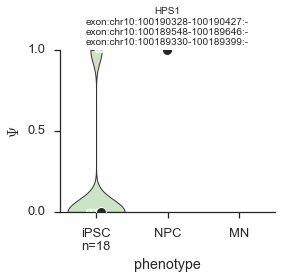

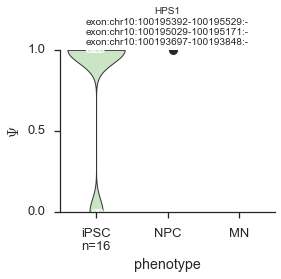

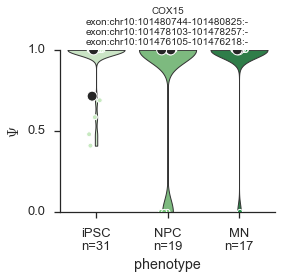

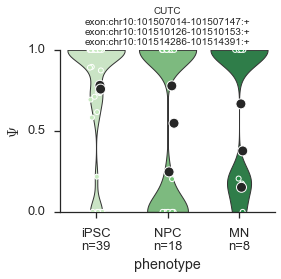

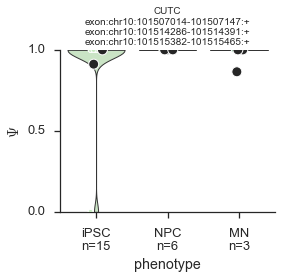

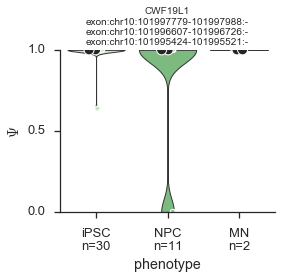

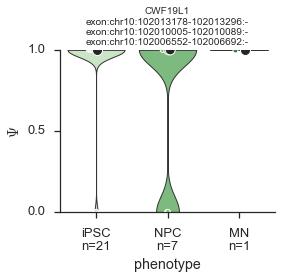

In [66]:
for i, (event_id, df) in enumerate(bimodal.groupby('event_id')):
    study.plot_event(event_id, sample_subset='~outlier')
    fig = plt.gcf()
    symbol = study.splicing.feature_data.loc[event_id, 'gene_name']
    ensembl = study.splicing.feature_data.loc[event_id, 'ensembl_id']
    
    fig.savefig('{folder}/{symbol}_{ensembl}_{event_id}'.format(
            folder=folder, symbol=symbol, event_id=event_id, ensembl=ensembl))
    if i > 5:
        break